In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.data import *
from utils.MobileNet import *
from time import time
from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adam
from keras.regularizers import l1,l2
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Load data

In [2]:
#number of classes to consider
n_classes = 5

#resolution multiplier in (0,1)
#image shape is (pho*224,pho*224,3)
pho = 1

t1 = time()
x, y, label_to_breed, breed_to_label = load_data(width = int(pho*224), 
                                                         height = int(pho*224), 
                                                         n_classes = n_classes)
print('Time to load the data: %ss' % int(time()-t1))

./data/dog_images.tar and ./data/annotations.tar already exist. Begin extracting...
Standford dogs data and annotations were extracted. Begin creating dataset...
Dataset, labels and dictionaries are loaded
Time to load the data: 9s


In [3]:
print("x shape: {}".format(x.shape))
print("y shape: {}".format(y.shape))

x shape: (927, 224, 224, 3)
y shape: (927, 5)


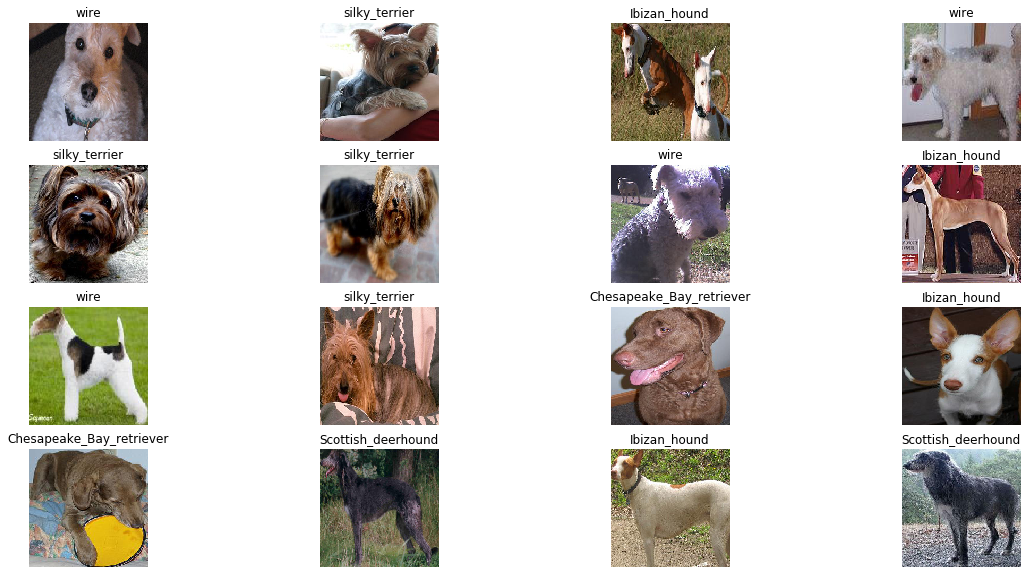

In [4]:
fig = plt.figure(figsize=(20,10))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(x[i])
    ax.axis('off')
    ax.title.set_text(label_to_breed[np.argmax(y[i])])

In [5]:
model = MobileNet(input_shape = x.shape[1:], 
              n_classes = n_classes, 
              alpha = 0.25, 
              reg_c= None,
              reg_dc = None,
              add_batch_norm = True, 
              add_dropout = False, 
              dropout_rate = 0.5, 
              optimizer = RMSprop(lr=0.001, rho=0.9))

In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1)

In [7]:
train_generator = datagen.flow(x,y,batch_size=128, subset='training')
validation_generator = datagen.flow(x,y, subset='validation')

In [8]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=30, verbose = 1)

Epoch 1/30
7/7 [==============================] - 48s 7s/step - loss: 3.2463 - accuracy: 0.2299 - val_loss: 1.5892 - val_accuracy: 0.2717
Epoch 2/30
7/7 [==============================] - 35s 5s/step - loss: 2.1390 - accuracy: 0.2503 - val_loss: 1.5763 - val_accuracy: 0.2717
Epoch 3/30
7/7 [==============================] - 37s 5s/step - loss: 2.0020 - accuracy: 0.2802 - val_loss: 1.5853 - val_accuracy: 0.2717
Epoch 4/30
7/7 [==============================] - 35s 5s/step - loss: 1.9665 - accuracy: 0.2695 - val_loss: 1.5772 - val_accuracy: 0.2717
Epoch 5/30
7/7 [==============================] - 44s 6s/step - loss: 1.9411 - accuracy: 0.2575 - val_loss: 1.6104 - val_accuracy: 0.2717
Epoch 6/30
7/7 [==============================] - 47s 7s/step - loss: 1.8829 - accuracy: 0.2587 - val_loss: 1.6437 - val_accuracy: 0.2717
Epoch 7/30
7/7 [==============================] - 41s 6s/step - loss: 1.7920 - accuracy: 0.2683 - val_loss: 1.6031 - val_accuracy: 0.2717
Epoch 8/30
7/7 [==================